In [79]:
# Load imports and data
import pandas as pd
from sklearn import svm
from sklearn.model_selection import train_test_split as tts, cross_val_score as cvs
from sklearn.metrics import classification_report as cr, confusion_matrix as cm
from sklearn import metrics
from matplotlib import pyplot as plt

# Function to plot feature importances
# Credit: https://stackoverflow.com/questions/41592661/determining-the-most-contributing-features-for-svm-classifier-in-sklearn
def f_importances(coef, names):
    imp = coef
    imp, names = zip(*sorted(list(zip(imp, names))))
    plt.barh(range(len(names)), imp, align='center')
    plt.yticks(range(len(names)), names)
    plt.show()
    
# Read data
train = pd.read_csv("training_all.csv")
test = pd.read_csv("test_all.csv")

# Remove first column containing line numbers
train = train.drop(train.columns[0], axis=1)
test = test.drop(test.columns[0], axis=1)
# Remove username column
train = train.drop('username', axis=1)
test = test.drop('username', axis=1)

In [80]:
# Run to display data structure statistics
print("Statistics for bots:")
display((train[train['label_y'] == 'bot'].describe()))
print("\nStatistics for humans:")
display((train[train['label_y'] == 'human'].describe()))
print("\nDifference between humans and bots [humans - bots]:")
display(train[train['label_y'] == 'human'].describe() - train[train['label_y'] == 'bot'].describe())
print("\nPreview of dataset:")
display(train.head())

Statistics for bots:


,hashtags,retweets,url,punctuations,sentence_length,emoji,levenshtein,polarity,subjectivity,possession,flesch_reading
count,1440.000000,1440.000000,1440.000000,1440.000000,1440.000000,1440.000000,1440.000000,1440.000000,1440.000000,1440.000000,1440.000000
mean,50.511806,4.684722,89.354861,10.397889,16.246111,116.479167,86.088148,0.087344,0.202705,0.001479,-56.834354
std,135.958384,18.261723,73.133478,8.932768,10.479220,608.762455,56.759626,0.076178,0.114236,0.004857,297.176042
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.070018,0.000000,0.000000,-2081.680000
25%,0.000000,0.000000,36.000000,4.730000,10.507500,1.000000,55.922374,0.025735,0.121832,0.000000,-12.630000
50%,0.000000,0.000000,74.000000,7.180000,13.050000,6.000000,68.960707,0.084340,0.227590,0.000000,37.340000
75%,11.000000,0.000000,178.000000,14.832500,17.200000,90.000000,89.488788,0.130146,0.277985,0.000000,61.625000
max,683.000000,105.000000,300.000000,80.080000,39.300000,7408.000000,208.476364,0.491500,0.600000,0.040000,105.340000



Statistics for humans:


,hashtags,retweets,url,punctuations,sentence_length,emoji,levenshtein,polarity,subjectivity,possession,flesch_reading
count,1440.000000,1440.000000,1440.000000,1440.000000,1440.000000,1440.000000,1440.000000,1440.000000,1440.000000,1440.000000,1440.000000
mean,38.095139,34.221528,44.983333,7.697792,14.829785,79.229861,94.600997,0.090215,0.237857,0.003479,49.615111
std,45.645307,27.247869,26.938682,2.092047,4.092688,62.493435,23.161779,0.047544,0.061866,0.008077,46.070967
min,0.000000,0.000000,0.000000,2.400000,5.080000,0.000000,35.154545,-0.017647,0.060389,0.000000,-870.450000
25%,8.000000,11.000000,26.000000,6.107500,12.090000,34.750000,78.666111,0.055154,0.198047,0.000000,44.375000
50%,21.000000,26.000000,40.000000,7.765000,14.475000,70.000000,91.775859,0.085855,0.235248,0.000000,55.845000
75%,52.000000,57.000000,59.000000,9.070000,17.215000,108.000000,106.993535,0.120294,0.279282,0.000000,66.780000
max,308.000000,99.000000,182.000000,16.650000,32.140000,770.000000,190.775152,0.311831,0.522989,0.070000,90.090000



Difference between humans and bots [humans - bots]:


,hashtags,retweets,url,punctuations,sentence_length,emoji,levenshtein,polarity,subjectivity,possession,flesch_reading
count,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
mean,-12.416667,29.536806,-44.371528,-2.700097,-1.416326,-37.249306,8.512849,0.002871,0.035152,0.002000,106.449465
std,-90.313077,8.986146,-46.194797,-6.840722,-6.386531,-546.269021,-33.597847,-0.028633,-0.052370,0.003219,-251.105075
min,0.000000,0.000000,0.000000,2.400000,5.080000,0.000000,35.154545,0.052371,0.060389,0.000000,1211.230000
25%,8.000000,11.000000,-10.000000,1.377500,1.582500,33.750000,22.743737,0.029418,0.076215,0.000000,57.005000
50%,21.000000,26.000000,-34.000000,0.585000,1.425000,64.000000,22.815152,0.001515,0.007658,0.000000,18.505000
75%,41.000000,57.000000,-119.000000,-5.762500,0.015000,18.000000,17.504747,-0.009852,0.001296,0.000000,5.155000
max,-375.000000,-6.000000,-118.000000,-63.430000,-7.160000,-6638.000000,-17.701212,-0.179669,-0.077011,0.030000,-15.250000



Preview of dataset:


,hashtags,retweets,url,punctuations,sentence_length,emoji,levenshtein,polarity,subjectivity,possession,flesch_reading,label_y
0,10,0,198,20.52,35.36,150,204.660808,0.113351,0.303732,0.00,9.45,bot
1,13,0,204,19.94,36.24,146,201.384242,0.134608,0.298778,0.01,21.26,bot
2,149,0,196,21.81,35.75,153,203.446263,0.099087,0.275899,0.01,6.41,bot
3,615,0,173,24.21,37.35,242,172.770303,0.148206,0.327628,0.00,14.30,bot
4,331,0,192,24.28,36.01,212,201.637980,0.132119,0.299436,0.00,-0.71,bot


In [81]:
# Load features and their values into X
X_train = train.drop('label_y', axis=1)                # X = [n_samples, n_features]
X_test = test.drop('label_y', axis=1)   
# Load class data corresponding to X into y
y_train = train['label_y']                             # y = [n_class_labels]
y_test = test['label_y']

# Uncomment below to test only specific features
# Copy and paste features from here: 
# 'hashtags', 'retweets', 'url', 'punctuations', 'sentence_length', 'emoji', 'levenshtein', 'polarity', 'subjectivity', 'possession', 'flesch_reading'  
#----------------------------------------------#
X_train = X_train[['subjectivity', 'possession', 'levenshtein', 'punctuations', 'polarity', 'sentence_length', 'retweets']]
X_test = X_test[['subjectivity', 'possession', 'levenshtein', 'punctuations', 'polarity', 'sentence_length', 'retweets']]

print("Preview of dataset:")
display(X_train.head())
#----------------------------------------------#

# Create classifier
classifier = svm.SVC(kernel='linear')

# Train classifier
classifier.fit(X_train, y_train);

Preview of dataset:


,subjectivity,possession,levenshtein,punctuations,polarity,sentence_length,retweets
0,0.303732,0.00,204.660808,20.52,0.113351,35.36,0
1,0.298778,0.01,201.384242,19.94,0.134608,36.24,0
2,0.275899,0.01,203.446263,21.81,0.099087,35.75,0
3,0.327628,0.00,172.770303,24.21,0.148206,37.35,0
4,0.299436,0.00,201.637980,24.28,0.132119,36.01,0



Feature importance:


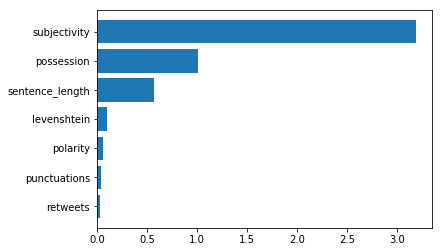

In [82]:
# Print feature importance
print("\nFeature importance:")
f_importances(abs(classifier.coef_[0]), X_train.columns.values)

In [83]:
# Test classifier
y_predicted = classifier.predict(X_test)

# Output confusion matrix
print("Simple split results:")
print("\nConfusion matrix:\n")
print(cm(y_test, y_predicted))

# Output classification report
print("\nClassification report:\n")
print(cr(y_test, y_predicted))

# Cross-validation
print("Cross-validation results:\n")
scores = cvs(classifier, X_train, y_train, cv=10)
print(scores)
print("Average accuracy: %0.2f\n" % (scores.mean()))

Simple split results:

Confusion matrix:

[[494 126]
 [ 59 561]]

Classification report:

              precision    recall  f1-score   support

         bot       0.89      0.80      0.84       620
       human       0.82      0.90      0.86       620

   micro avg       0.85      0.85      0.85      1240
   macro avg       0.85      0.85      0.85      1240
weighted avg       0.85      0.85      0.85      1240

Cross-validation results:

[0.90277778 0.96875    0.82986111 0.95486111 0.87152778 0.90277778
 0.84375    0.8125     0.90625    0.85763889]
Average accuracy: 0.89

